# Linear Regression

## Imports

In [1]:
import random
import pandas as pd
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

## Load data

Define the path to the file containing the data

In [2]:
datafile = "lausanne-appart.csv"

Read the data

In [3]:
dataset = pd.read_csv(datafile)

Display first rows

In [4]:
dataset.head()

,living_area,nb_rooms,rent_price
0,69,3.0,1810
1,95,3.5,2945
2,21,1.5,685
3,20,1.0,720
4,33,1.5,830


In [5]:
# get numpy arrays from panda objects
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values
print(type(rent_price))
print(rent_price.shape, living_area.shape)

<class 'numpy.ndarray'>
(201,) (201,)


## Part 1 - Visualize the data

a) Plot a histogram to visualize the distribution of the renting price

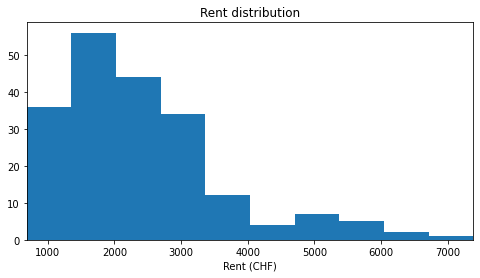

In [6]:
plt.figure(1, figsize=(8, 4))
plt.hist(rent_price)
plt.xlabel("Rent (CHF)")
plt.title("Rent distribution")
plt.xlim(np.min(rent_price), np.max(rent_price))
plt.show()

b) Plot a histogram to visualize the distribution of the living area

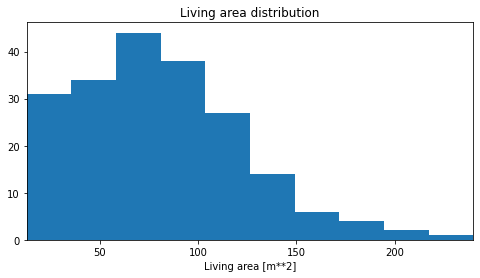

In [7]:
# Your code here

plt.figure(2, figsize=(8, 4))
plt.hist(living_area)
plt.xlabel("Living area [m**2]")
plt.title("Living area distribution")
plt.xlim(np.min(living_area), np.max(living_area))
plt.show()

c) Plot a scatter plot of renting price as a function of living area

Text(0, 0.5, 'Renting price')

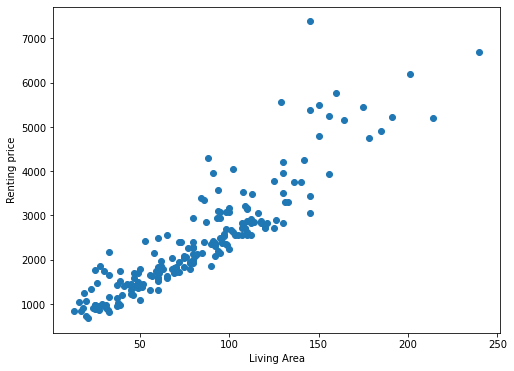

In [8]:
# Your code here

plt.figure(3, figsize=(8, 6))
plt.scatter(living_area, rent_price)
plt.xlabel("Living Area")
plt.ylabel("Renting price")

## Part 2 - Normal equations for linear regression - using numpy arrays

a) Implement the closed form solution to this problem using the following normal equation:

<div><div style="display: table-cell; width: 100%;"><center>$\theta = (X^{T}X)^{-1}X^{T}\vec{y}$</center></div><div style="display: table-cell; width: 100%;">$(3)$</div></div>

Assuming $x$ is the living area and $y$ is the renting price. Use `numpy` for the vector operations. Plot the computed line on top of the scatter plot of exercise 1.

(201, 1) (201, 1)


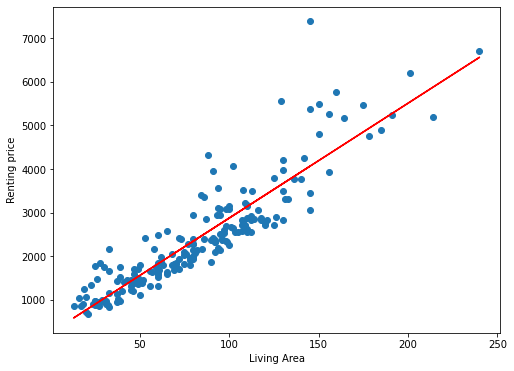

In [9]:
# Your code here

# Load data again just to be sure that they have the original data type and structure
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values

# Transform to a genuine Nx1 vector
living_area_array = np.reshape( living_area , ( np.shape(living_area)[0], 1 ) )
rent_price_array = np.reshape( rent_price, (np.shape(rent_price)[0], 1))

# Verify that it has the Nx1 dimension
print(np.shape(living_area_array), np.shape(rent_price_array))

# Generate the x and y vectors
xVec = np.append( np.ones(np.shape(living_area_array)) , living_area_array, axis=1)
yVec = np.reshape(rent_price_array, ( np.shape(rent_price_array)[0], 1 ))

# Calculation of theta, for better readability with step results
zwRes1 = np.dot( np.transpose(xVec) , xVec )
zwRes2 = np.dot(inv( zwRes1 ) , np.transpose( xVec ) )
theta = np.dot(zwRes2, yVec)
print(theta)

# Linear function
linReg = lambda x: theta[1] * x + theta[0]

plt.figure(4, figsize=(8, 6))
plt.scatter(living_area_array, rent_price_array)
plt.xlabel("Living Area")
plt.ylabel("Renting price")
plt.plot(living_area_array, linReg(living_area_array), 'r' )
plt.show()


b) Compute the overall cost value according to the following equation:

<div><div style="display: table-cell; width: 100%;"><center>$J(\theta) = \frac{1}{2N} \sum_{n=1}^{N} (h_{\theta}(\mathbf{x}_{n}) - y_{n})^{2}$</center></div><div style="display: table-cell; width: 100%;">$(2)$</div></div>

In [15]:
# Your code here

cost = 0
for ii in range(np.shape(living_area_array)[0]):
    cost += (linReg(living_area_array[ii]) - rent_price_array[ii]) ** 2

cost = cost / (np.shape(living_area_array)[0] * 2)

print(cost)

[138034.95779787]


## Part 3 - Normal equations for linear regression - using pytorch tensors

Redo the part 2, this time using pytorch tensors.

tensor([240.0771,  26.3324], dtype=torch.float64)


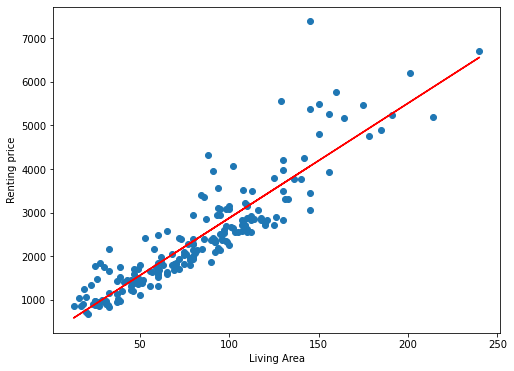

tensor(138034.9578, dtype=torch.float64)


In [17]:
# Your code here
import torch

# Load data again just to be sure that they have the original data type and structure
rent_price = dataset.rent_price.values
living_area = dataset.living_area.values

# Transform data to an Nx1 tensor
living_area_tensor = torch.tensor(living_area, dtype=float)
rent_price_tensor = torch.tensor(rent_price, dtype=float)

# Generate the x and y tensors
xVec_tensor = torch.zeros((living_area_tensor.size(dim=0), 2), dtype=float)
xVec_tensor[:,0] = torch.ones( living_area_tensor.shape )
xVec_tensor[:,1] = living_area_tensor

yVec_tensor = rent_price_tensor

# Calculate theta
zwRes1_tensor = torch.mm( torch.t( xVec_tensor ), xVec_tensor )
zwRes2_tensor = torch.mm( torch.inverse( zwRes1_tensor ) , torch.t( xVec_tensor ) )
theta_tensor = torch.matmul(zwRes2_tensor, yVec_tensor)

print(theta_tensor)

linReg_tensor = lambda x: theta_tensor[1] * x + theta_tensor[0]

plt.figure(6, figsize=(8, 6))
plt.scatter(living_area_tensor, rent_price_tensor)
plt.xlabel("Living Area")
plt.ylabel("Renting price")
plt.plot(living_area_tensor, linReg_tensor(living_area_tensor), 'r' )
plt.show()

cost = 0
for ii in range(living_area_tensor.size(dim=0)):
    cost += (linReg_tensor(living_area_tensor[ii]) - rent_price_tensor[ii]) ** 2

cost = cost / (living_area_tensor.size(dim=0) * 2)

print(cost)

